In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier

Problem-1)
Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

Solution:

In [ ]:
#data loading
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [ ]:
fraud_df=pd.read_csv('Fraud_check.csv')
fraud_df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


Basic and EDA

In [ ]:
fraud_df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [ ]:
fraud_df['tax_type']=np.where(fraud_df['Taxable.Income']<=30000, 'Risky','Good')
fraud_df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [ ]:
fraud_df.rename(columns = {'Undergrad':'undergraduate','Marital.Status':'marital_status','Taxable.Income':'taxable_income',
                           'City.Population':'city_population','Work.Experience':'work_exp','Urban':'urban'}, inplace = True)
     

In [ ]:
fraud_df.describe()

,taxable_income,city_population,work_exp
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   undergraduate    600 non-null    object
 1   marital_status   600 non-null    object
 2   taxable_income   600 non-null    int64 
 3   city_population  600 non-null    int64 
 4   work_exp         600 non-null    int64 
 5   urban            600 non-null    object
 6   tax_type         600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


* Datatypes of features are correct

In [ ]:
fraud_df.shape

(600, 7)

In [ ]:
fraud_df.isnull().sum()

undergraduate      0
marital_status     0
taxable_income     0
city_population    0
work_exp           0
urban              0
tax_type           0
dtype: int64

* There are no duplicate records in the data

In [ ]:
for i, column in enumerate(fraud_df.columns, 1):
  print(fraud_df[column].value_counts())

YES    312
NO     288
Name: undergraduate, dtype: int64
Single      217
Married     194
Divorced    189
Name: marital_status, dtype: int64
59689    2
68833    1
60822    1
93090    1
79373    1
        ..
61906    1
31088    1
70365    1
56536    1
96519    1
Name: taxable_income, Length: 599, dtype: int64
57194     2
162777    2
50047     1
130912    1
64070     1
         ..
145744    1
58225     1
28661     1
117260    1
158137    1
Name: city_population, Length: 598, dtype: int64
10    31
13    28
30    25
28    25
12    25
14    24
11    23
21    23
5     22
27    22
26    22
7     21
29    21
19    21
16    19
6     19
25    19
2     19
17    18
15    18
24    17
23    16
20    15
0     14
1     14
8     14
3     14
4     14
22    13
9     13
18    11
Name: work_exp, dtype: int64
YES    302
NO     298
Name: urban, dtype: int64
Good     476
Risky    124
Name: tax_type, dtype: int64


Visualising the Data Points

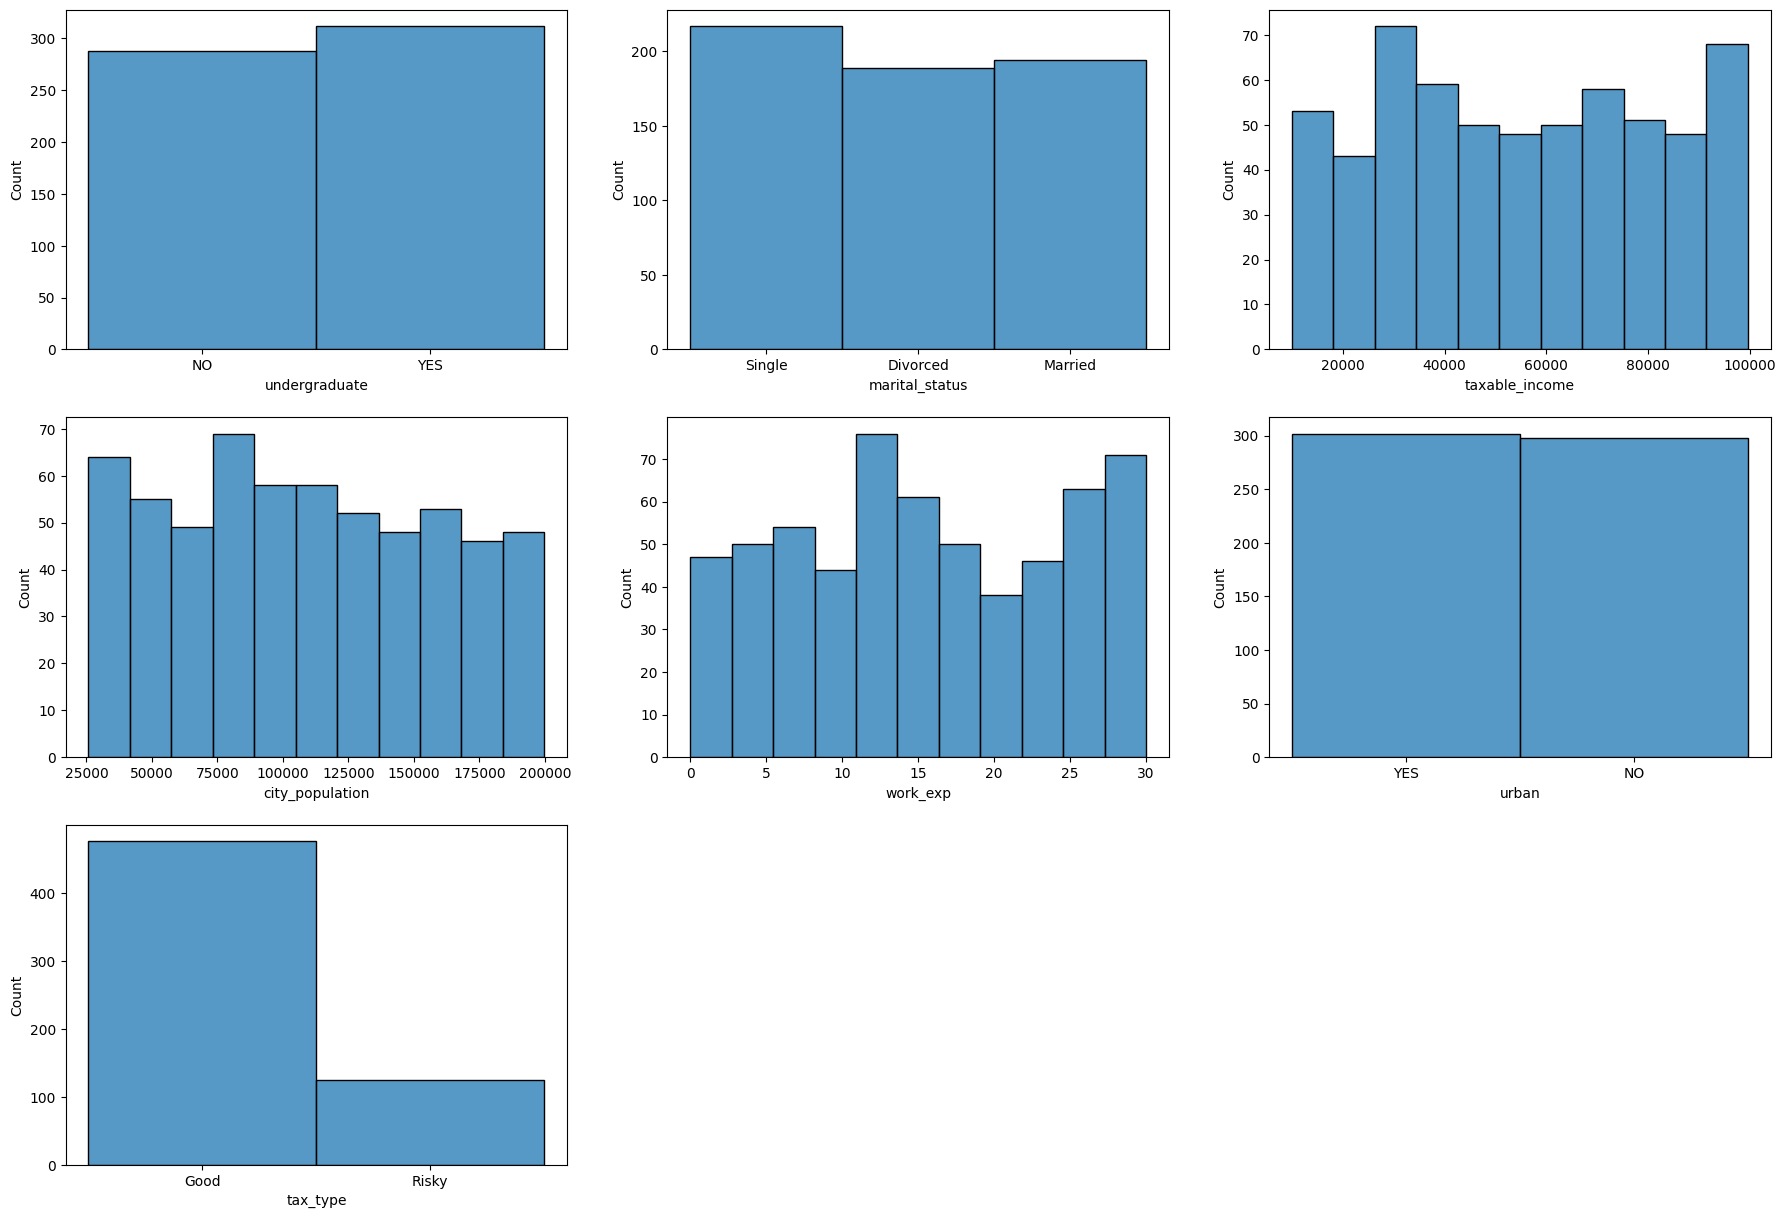

In [ ]:
#plotting hisplot to observe datapoints nature
plt.figure(figsize=(22,15))
for i, column in enumerate(fraud_df.columns, 1):
  plt.subplot(3,3,i)
  sns.histplot(fraud_df[column])

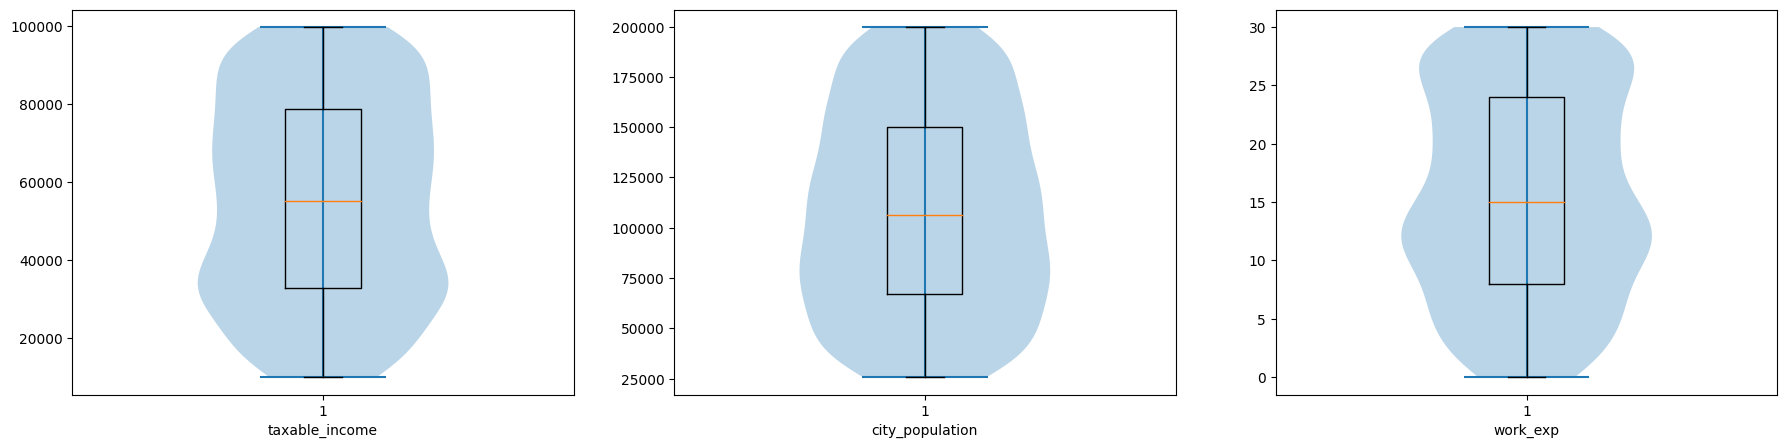

In [ ]:
#plotting boxplots to observe datapoints nature
plt.figure(figsize=(22,5))
for i, column in enumerate(fraud_df[[feature for feature in fraud_df.columns if fraud_df[feature].dtypes != 'O']].columns, 1):
    plt.subplot(1,3,i)
    plt.violinplot(fraud_df[column])
    plt.boxplot(fraud_df[column])
    plt.xlabel(fraud_df[column].name)

* There are no outliers in the numerical fields of the given data.

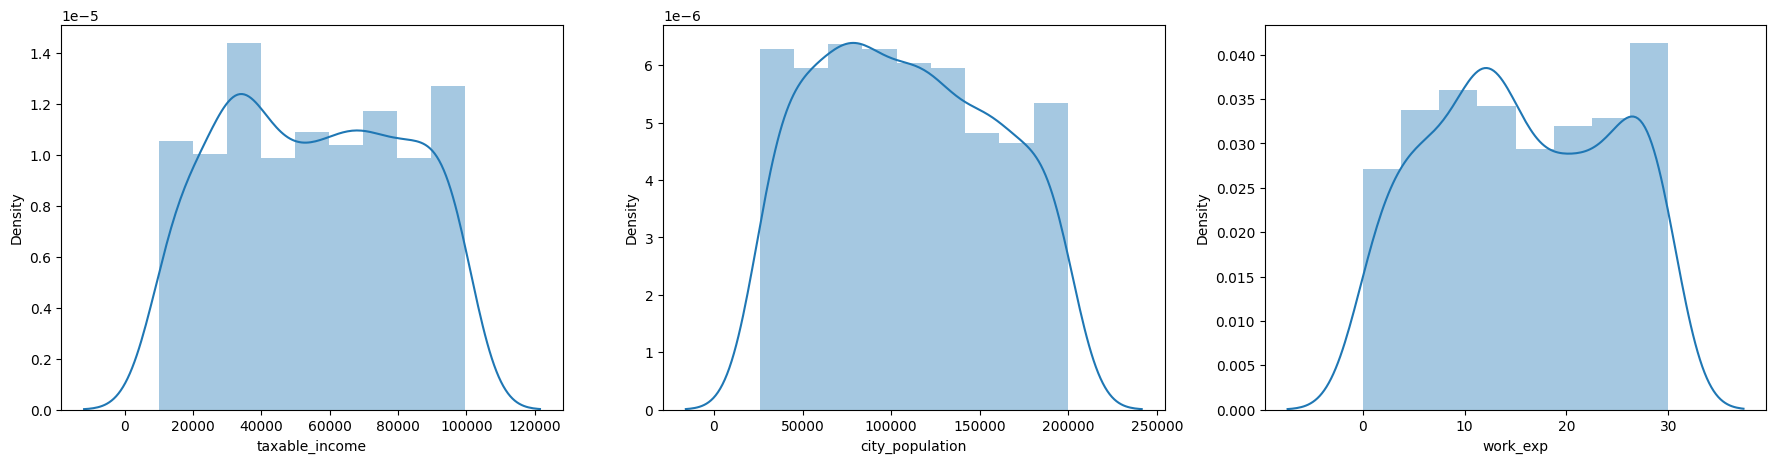

In [ ]:
#plotting histplots to observe datapoints nature
plt.figure(figsize=(22,5))
for i, column in enumerate(fraud_df[[feature for feature in fraud_df.columns if fraud_df[feature].dtypes != 'O']].columns, 1):
    plt.subplot(1,3,i)
    sns.distplot(fraud_df[column])

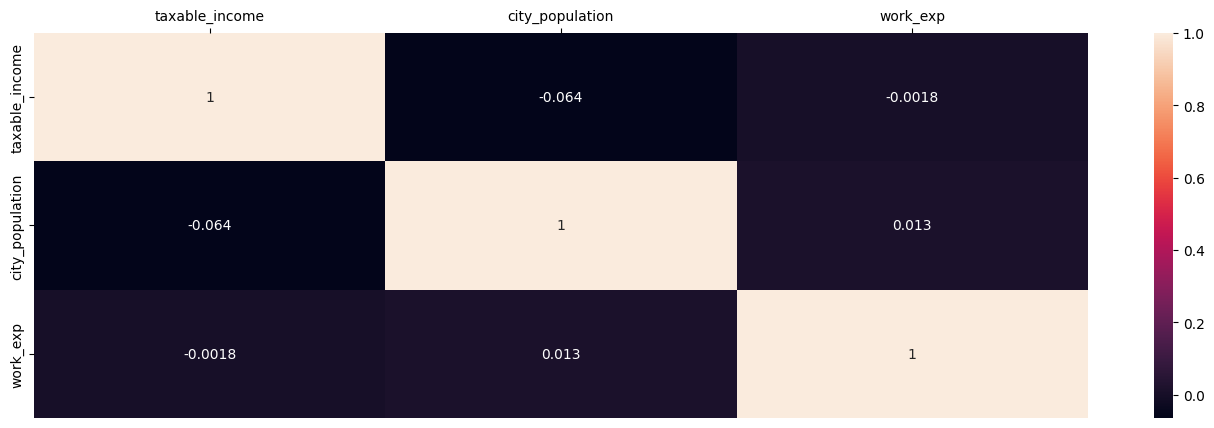

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(17,5))
ax = sns.heatmap(fraud_df.corr(), annot=True)
ax.xaxis.tick_top()

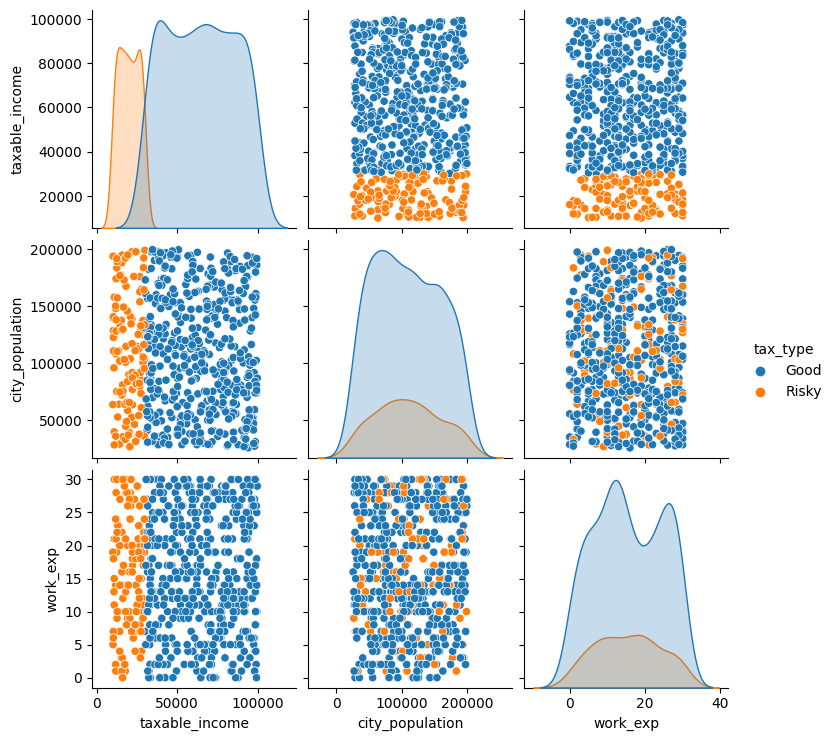

In [ ]:
#pairplot
sns.pairplot(fraud_df,hue='tax_type')

label Encoding

In [ ]:
fraud_df_lab=fraud_df.copy()
for i, column in enumerate(fraud_df_lab[[feature for feature in fraud_df_lab.columns if fraud_df_lab[feature].dtypes == 'O']].columns, 1):
  label_encoder=preprocessing.LabelEncoder()
  fraud_df_lab[column]=label_encoder.fit_transform(fraud_df_lab[column])

In [ ]:
fraud_df_lab=fraud_df_lab.drop('taxable_income',axis=1)
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std.fit_transform(fraud_df_lab)

array([[-1.040833  ,  1.16079994, -1.17852072, -0.62914254,  0.99335541,
        -0.51039612],
       [ 0.96076892, -1.27444469,  0.50850002,  0.27636996,  0.99335541,
        -0.51039612],
       [-1.040833  , -0.05682237,  1.03310911,  1.63463872,  0.99335541,
        -0.51039612],
       ...,
       [-1.040833  , -1.27444469,  0.90969648, -1.76103318,  0.99335541,
        -0.51039612],
       [ 0.96076892, -0.05682237,  1.43219749,  0.1631809 , -1.00668904,
        -0.51039612],
       [-1.040833  , -1.27444469,  0.9915901 ,  0.04999184, -1.00668904,
        -0.51039612]])

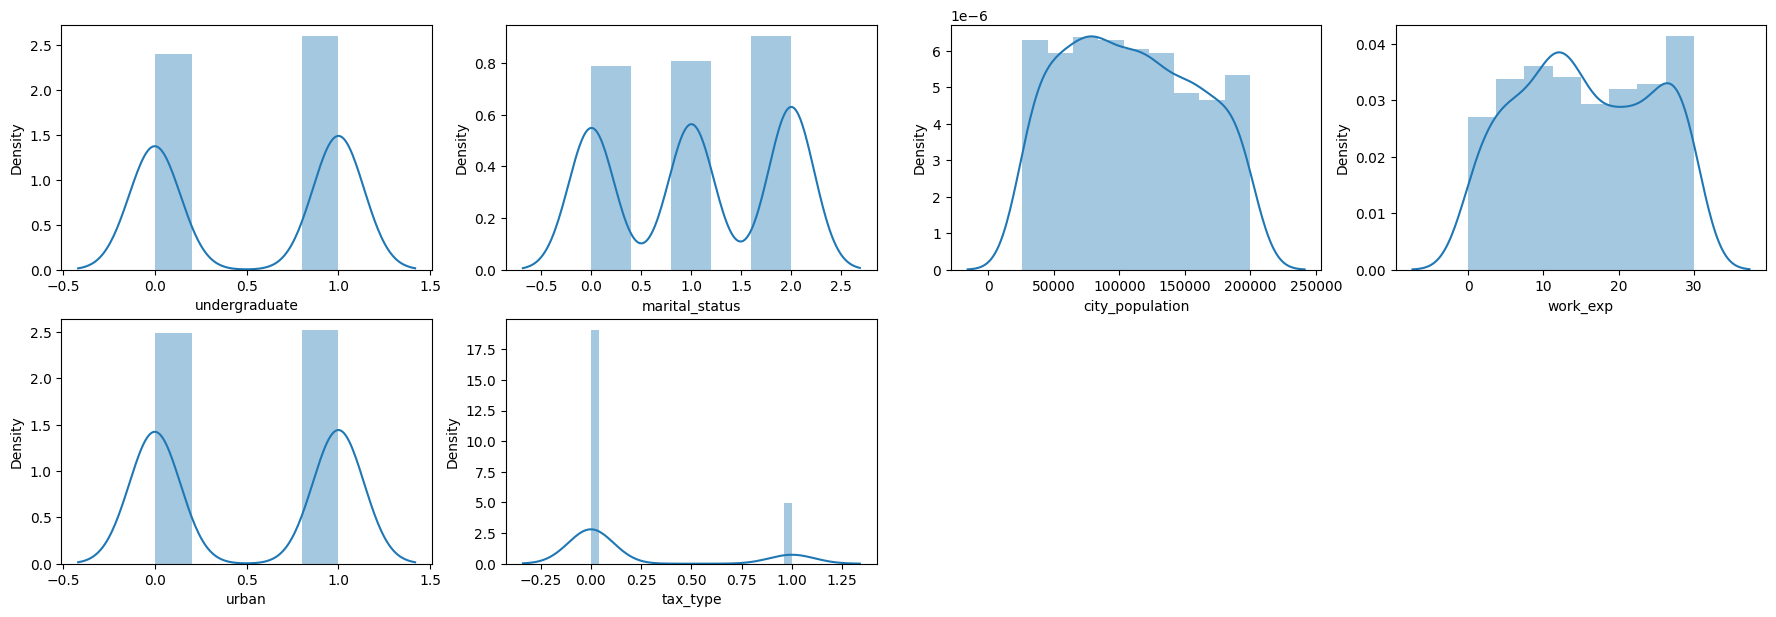

In [ ]:
#plotting histplots to observe datapoints nature
plt.figure(figsize=(22,7))
for i, column in enumerate(fraud_df_lab.columns, 1):
    plt.subplot(2,4,i)
    sns.distplot(fraud_df_lab[column])

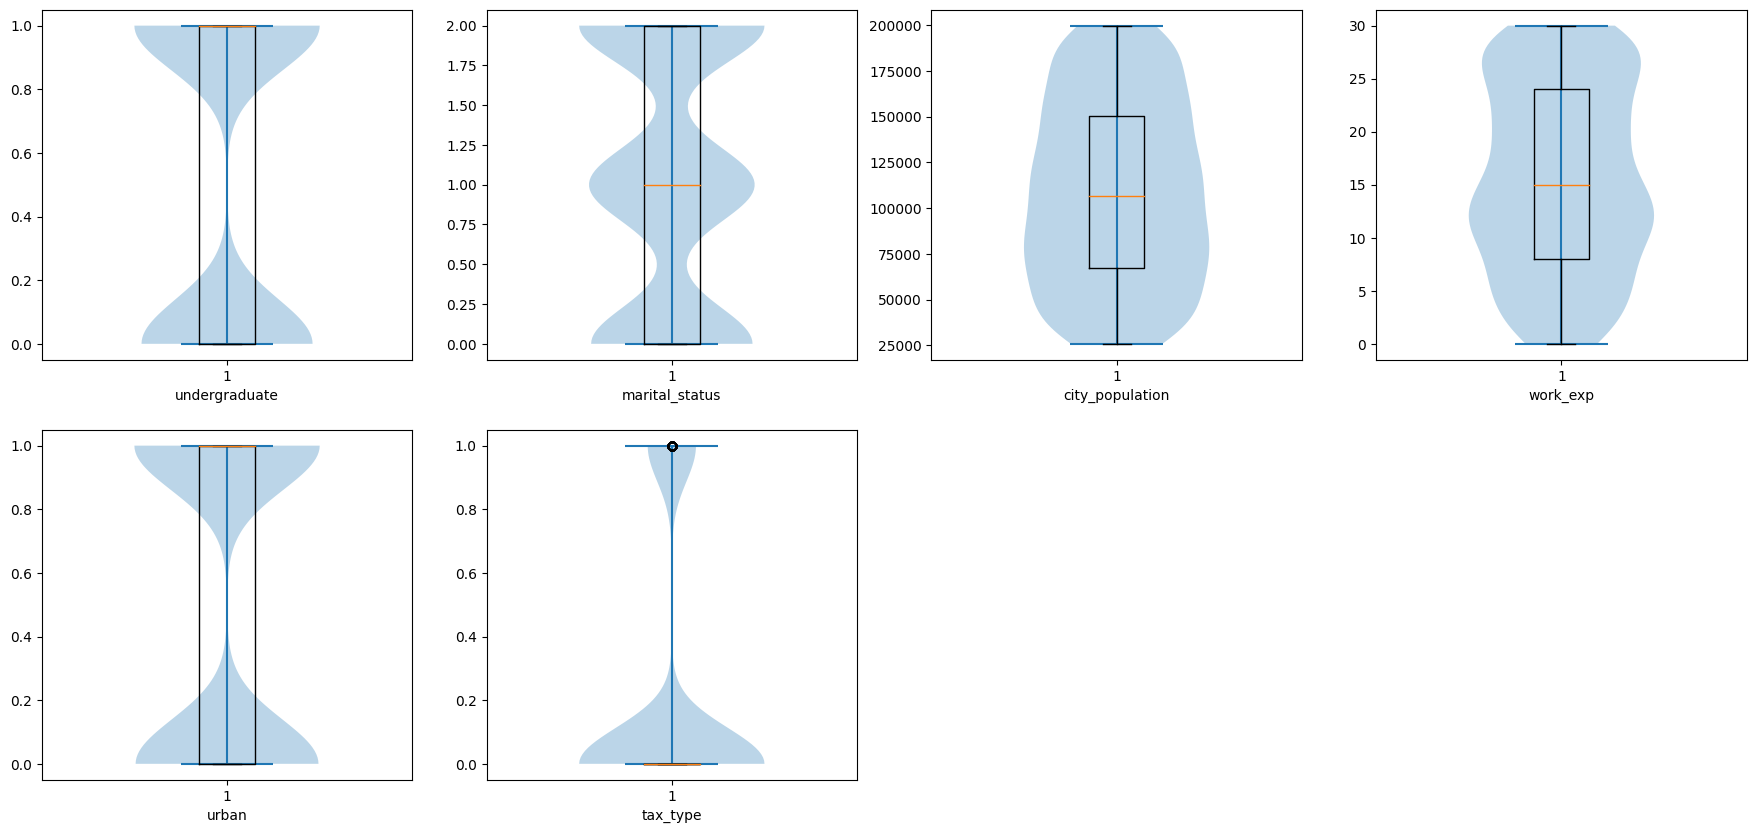

In [ ]:
#plotting boxplots to observe datapoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(fraud_df_lab.columns, 1):
    plt.subplot(2,4,i)
    plt.violinplot(fraud_df_lab[column])
    plt.boxplot(fraud_df_lab[column])
    plt.xlabel(fraud_df_lab[column].name)

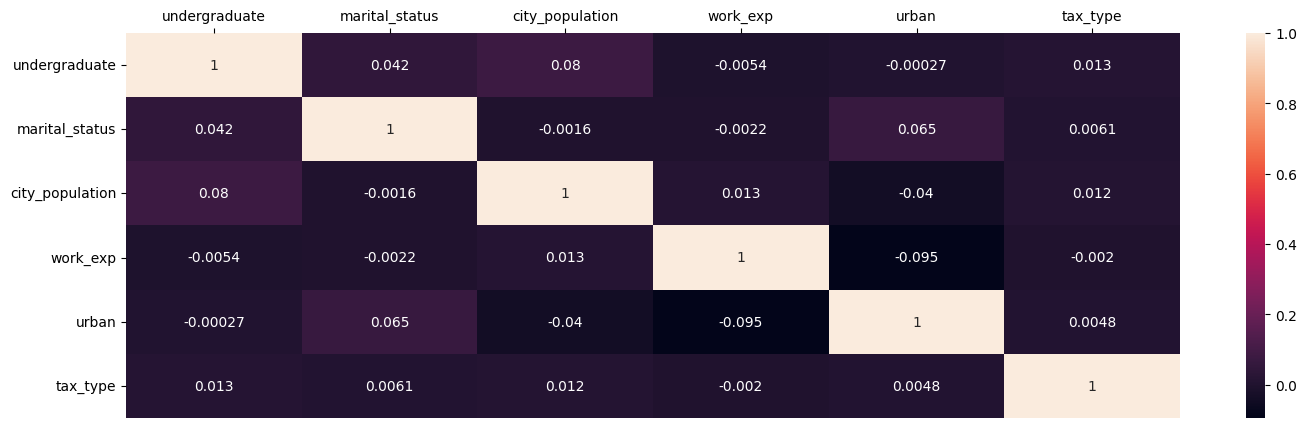

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(17,5))
ax = sns.heatmap(fraud_df_lab.corr(),annot=True)
ax.xaxis.tick_top()

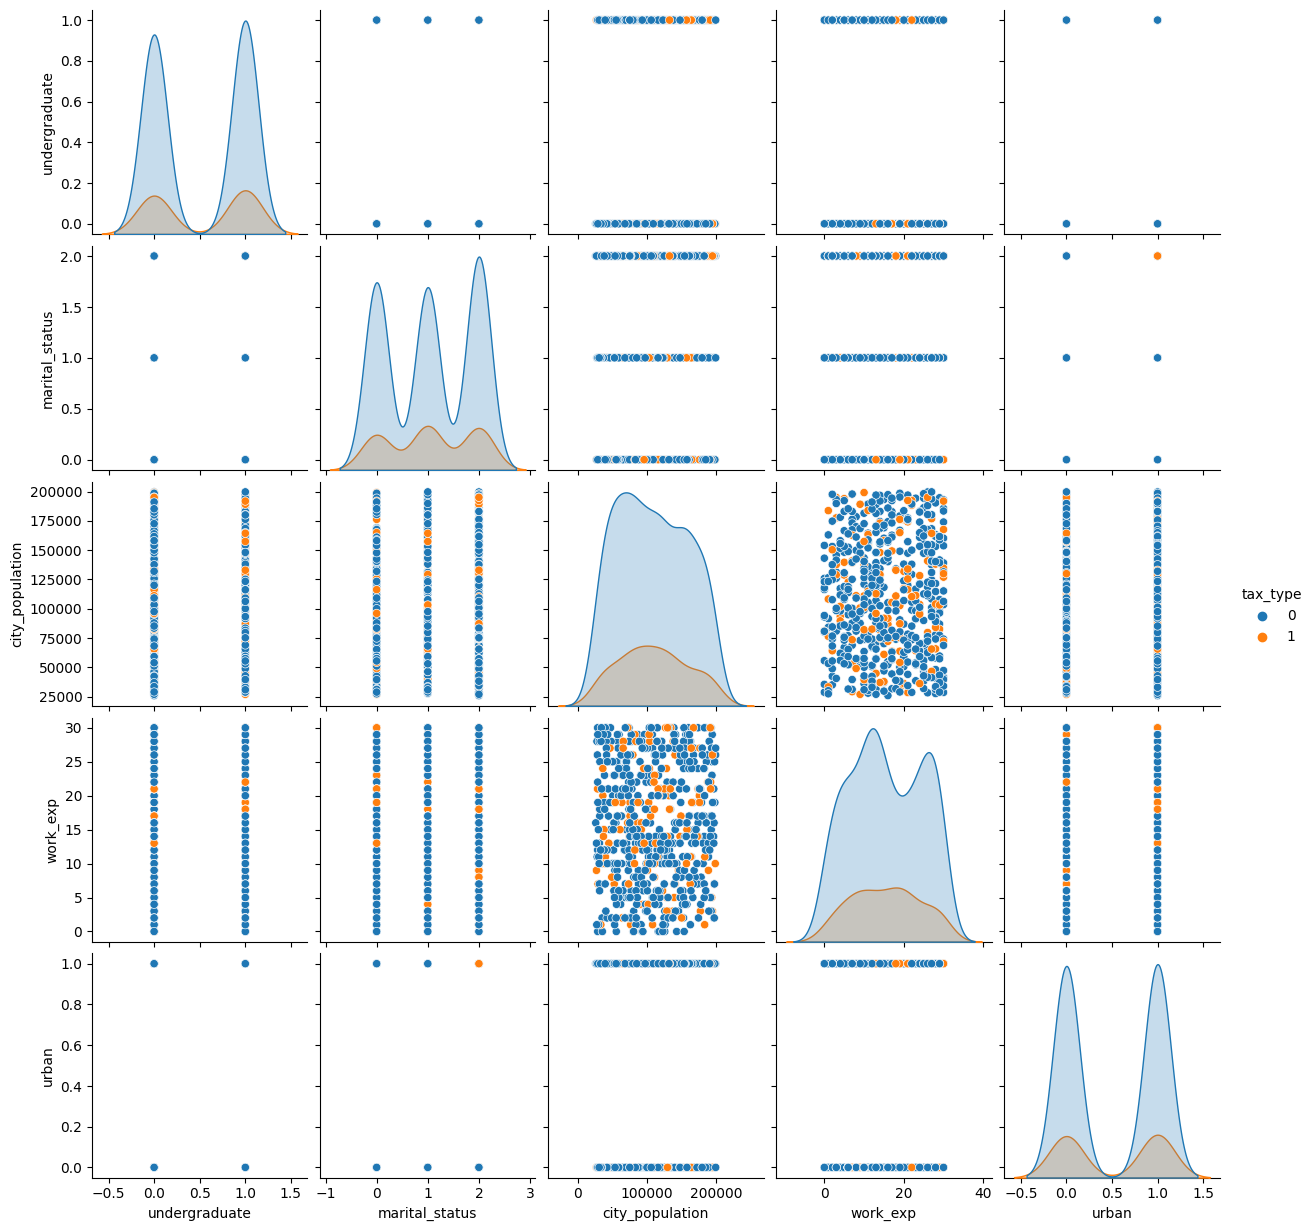

In [ ]:
#plotting pairplot
sns.pairplot(fraud_df_lab,hue='tax_type')

Data Splitting for testing

In [ ]:
x=fraud_df_lab.drop('tax_type',axis=1)
y=fraud_df_lab['tax_type']

In [ ]:
x.shape,y.shape

((600, 5), (600,))

In [ ]:
y.value_counts()

0    476
1    124
Name: tax_type, dtype: int64

In [ ]:
# data --> train data + testdata
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [ ]:
x

,undergraduate,marital_status,city_population,work_exp,urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax_type, Length: 600, dtype: int64

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
clf_bgm=GradientBoostingClassifier()
clf_bgm.fit(x_train,y_train)
y_pred=clf_bgm.predict(x_test)
accuracy_score(y_test,y_pred)

0.7666666666666667

Hypertuning parameters for random forest classifier

In [ ]:
def print_score(clf, x_train, y_train, x_test, y_test):
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print(f"\n Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print(f"\n CLASSIFICATION REPORT:\n{clf_report}")
        print(f"\nConfusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
params = {'n_estimators': [100,200, 500],'max_features': ['auto', 'sqrt', 'log2'],"criterion":["gini", "entropy"], "max_depth":(list(range(1,10)))}

rf_clf = RandomForestClassifier(random_state= 42)
tree_cv = GridSearchCV(rf_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(x_train, y_train)
print_score(rf_clf, x_train, y_train, x_test, y_test)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 100})

 Accuracy Score: 80.00%

 CLASSIFICATION REPORT:
                    0     1  accuracy   macro avg  weighted avg
precision    0.800000   0.0       0.8    0.400000      0.640000
recall       1.000000   0.0       0.8    0.500000      0.800000
f1-score     0.888889   0.0       0.8    0.444444      0.711111
support    360.000000  90.0       0.8  450.000000    450.000000

Confusion Matrix: 
 [[360   0]
 [ 90   0]]



In [ ]:
tree_cv.best_estimator_

RandomForestClassifier(max_depth=1, max_features='auto', random_state=42)

Random forest classifier-entropy

In [ ]:
rfclf_entropy=RandomForestClassifier(criterion='entropy',max_depth=1,random_state= 42,max_features= 'auto', n_estimators= 100)
rfclf_entropy.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=1, max_features='auto',
                       random_state=42)

In [ ]:
pred=rfclf_entropy.predict(x_test)
accuracy_score(y_test,pred)

0.7733333333333333

Random forest classifier - gini

In [ ]:
rfclf_gini=RandomForestClassifier(criterion='gini',max_depth=1,random_state= 42,max_features= 'auto', n_estimators= 100)
rfclf_gini.fit(x_train,y_train)

RandomForestClassifier(max_depth=1, max_features='auto', random_state=42)

In [ ]:
pred=rfclf_gini.predict(x_test)
accuracy_score(y_test,pred)

0.7733333333333333

In [ ]:
fraud_df_lab.columns

Index(['undergraduate', 'marital_status', 'city_population', 'work_exp',
       'urban', 'tax_type'],
      dtype='object')

In [ ]:
# define a function for plotting the feature importances
def plot_feature_importances(model):
    feature_importances = pd.Series(model.feature_importances_, index=model.feature_names_in_)
    feature_importances = feature_importances.sort_values(axis=0, ascending=False)
    fig, ax = plt.subplots()
    feature_importances.plot.bar()
    ax.set_title("Feature importances")
    fig.tight_layout()

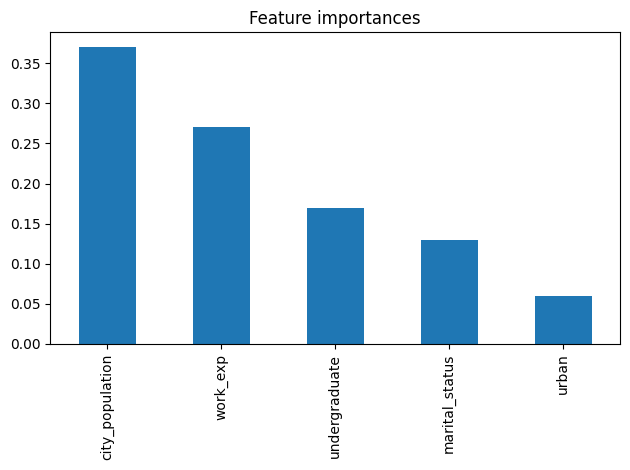

In [ ]:
plot_feature_importances(rfclf_entropy)

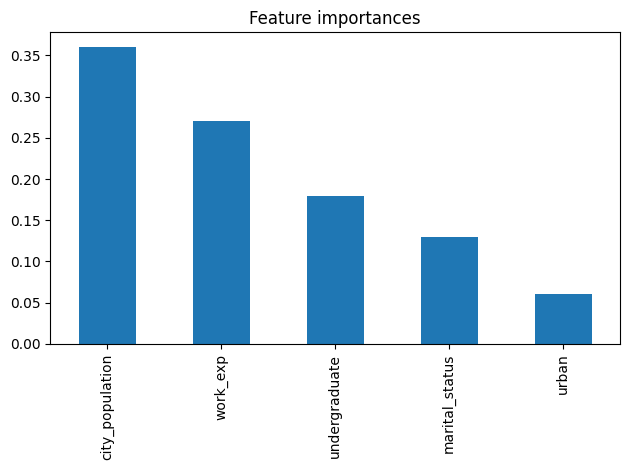

In [ ]:
plot_feature_importances(rfclf_gini)

Bagging

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

kfold=KFold(n_splits=10)#evaluation method
cart=DecisionTreeClassifier()
num_trees = 100

model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=42)#classifier
results=cross_val_score(model,x,y,cv=kfold)
     

In [ ]:
model.fit(x_train, y_train);
print('\n confusion matrix :\n',confusion_matrix(y_test,model.predict(x_test)))
print('\n accuarcy :\n',accuracy_score(y_test,model.predict(x_test)))


 confusion matrix :
 [[110   6]
 [ 32   2]]

 accuarcy :
 0.7466666666666667


Boosting

In [ ]:
#AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10
seed=0
kfold = KFold(n_splits=10)

model=AdaBoostClassifier(n_estimators=num_trees,random_state=seed)
results=cross_val_score(model,x,y,cv=kfold)

In [ ]:
model.fit(x_train, y_train);
print('\n confusion matrix :\n',confusion_matrix(y_test,model.predict(x_test)))
print('\n accuarcy :\n',accuracy_score(y_test,model.predict(x_test)))


 confusion matrix :
 [[115   1]
 [ 34   0]]

 accuarcy :
 0.7666666666666667


Conclusion:

In [ ]:
# comparing accuracy of models
Accuracy_tab={'Model':pd.Series(['rfclf-gini','Bagging','Boosting']),
     'accuracy':pd.Series(['80%','74%','76%'])}
     
Accuracy_tab=pd.DataFrame(Accuracy_tab)
Accuracy_tab.style.set_properties(**{'background-color': 'darkkhaki',
                           'color': 'darkred'})

,Model,accuracy
0,rfclf-gini,80%
1,Bagging,74%
2,Boosting,76%
